### Importing our libraries

In [122]:
import matplotlib
import matplotlib.pylab as plt
matplotlib.style.use('seaborn')
%matplotlib inline
from matplotlib.pylab import rcParams
from plotly.graph_objs import *
import statsmodels.api as sm
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from sklearn import preprocessing,cross_validation
from matplotlib import style
import datetime
import math

### Loading the data

In [123]:
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data

In [124]:
## Fetching the data
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data
params = [{'q':'AAL'}]
period = "5Y"
# get open, high, low, close, volume data (return pandas dataframe)
df = get_prices_data(params, period)
df.head()

,AAL_Open,AAL_High,AAL_Low,AAL_Close,AAL_Volume
2013-12-09,23.85,25.44,23.4501,24.60,43197268
2013-12-10,24.50,25.17,24.4100,24.88,18660625
2013-12-11,25.48,27.20,25.3700,25.99,38843371
2013-12-12,26.20,26.71,25.4500,25.45,19981824
2013-12-13,25.75,26.30,25.5201,26.23,12192421


### Cleaning the data

#### Filling all the nan values with -9999

In [125]:
#df['Date'] = pd.to_datetime(df['Date'])
forecast_col ='AAL_Close'
df.fillna(-99999,inplace=True)

#### Making an equation for weekly forecast.

In [126]:
forecast_out = int(math.ceil(0.09*len(df)))
forecast_out

100

### Forecasting

In [127]:
df['label']=df[forecast_col].shift(-forecast_out)


In [128]:
X = np.array(df.drop(['AAL_Close'],1))
X = X[:-forecast_out]
X_lately = X[-forecast_out:]
df.dropna(inplace=True)

In [129]:
Y = np.array(df['label'])
len(Y)

1003

### Training our data

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=0.2)

In [131]:
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, Y_train)
accuracy = clf.score(X_test, Y_test)
print(accuracy)

1.0


In [132]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style

In [133]:
style.use('ggplot')

In [134]:
forecast_set = clf.predict(X_lately)

In [135]:
df['Forecast'] = np.nan

In [136]:
from datetime import date
from datetime import datetime
d = df.iloc[-1].name
last_date=datetime.combine(d, datetime.min.time())
(d)

datetime.date(2017, 11, 30)

In [137]:
from dateutil.parser import parser
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [138]:
for i in forecast_set:
    next_date = datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

In [139]:
df.reset_index(level=None,inplace=True)
df=df.rename(index=str, columns={"index": "Date"})
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

### Plotting our prediction

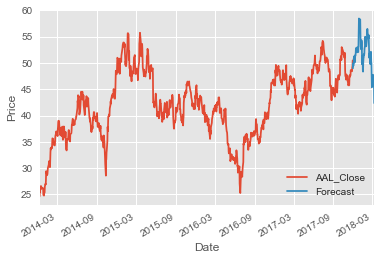

[ 49.    49.93  49.47  49.61  50.88  51.02  51.3   50.47  50.09  50.21
  51.06  51.49  51.44  51.92  52.79  52.59  52.85  52.4   52.46  52.03
  52.99  52.34  52.67  52.65  52.13  52.08  53.78  56.42  58.47  57.98
  58.16  58.34  58.06  58.1   58.29  54.79  53.05  53.07  52.68  52.59
  54.32  53.88  52.1   49.76  51.18  51.4   48.6   48.36  50.09  50.87
  51.07  51.67  51.58  51.72  52.78  52.98  53.39  55.    54.26  54.25
  53.48  53.18  53.19  53.57  54.11  54.79  56.07  56.5   56.23  55.28
  55.17  55.4   54.62  55.32  54.09  52.31  51.01  51.86  50.9   50.85
  51.96  49.78  51.47  52.04  52.14  50.29  49.82  47.46  45.4   46.57
  45.87  46.4   45.75  47.76  46.88  46.78  46.68  45.69  45.25  42.37]


In [140]:
df['AAL_Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
print(forecast_set)

### This plot gives us the predicted forecasting values 

In [141]:
df
df.reset_index(level=None,inplace=True)
df.head()

,Date,AAL_Open,AAL_High,AAL_Low,AAL_Close,AAL_Volume,label,Forecast
0,2013-12-09,23.85,25.44,23.4501,24.60,43197268.0,36.60,NaN
1,2013-12-10,24.50,25.17,24.4100,24.88,18660625.0,36.67,NaN
2,2013-12-11,25.48,27.20,25.3700,25.99,38843371.0,37.22,NaN
3,2013-12-12,26.20,26.71,25.4500,25.45,19981824.0,38.25,NaN
4,2013-12-13,25.75,26.30,25.5201,26.23,12192421.0,38.26,NaN


In [144]:
df[950:]

,Date,AAL_Open,AAL_High,AAL_Low,AAL_Close,AAL_Volume,label,Forecast
950,2017-09-18,46.02,46.3000,45.2700,45.31,4601233.0,48.36,NaN
951,2017-09-19,45.28,45.6600,44.0300,44.38,6884589.0,50.09,NaN
952,2017-09-20,44.92,45.5600,44.4600,45.42,4708125.0,50.87,NaN
953,2017-09-21,45.47,46.5700,44.9900,46.29,5864367.0,51.07,NaN
954,2017-09-22,46.57,47.4600,46.3500,47.06,5342021.0,51.67,NaN
955,2017-09-25,46.98,47.9600,46.8900,47.70,6363180.0,51.58,NaN
956,2017-09-26,47.84,48.2600,47.2300,47.58,4706004.0,51.72,NaN
957,2017-09-27,47.10,48.1000,46.6301,46.85,6151768.0,52.78,NaN
958,2017-09-28,46.78,48.6000,46.7800,47.49,8367839.0,52.98,NaN
959,2017-09-29,47.49,47.8500,47.2300,47.49,4904347.0,53.39,NaN
